In [1]:
import os
import sys
sys.path.insert(0,'..')
import numpy as np
from analysis.tf_utils import *
from analysis.analysis_utils import *
import matplotlib.pyplot as plt
from analysis.summary_parallel import Summary
#sfrom analysis.summary import run_summary

%matplotlib inline

# Experiment settings

In [2]:
base_dir = ""
task_dir = "datasweep_suppb_r2.pkl"
task_dir = "datasweep_mainrd_1.pkl"

summary_settings = {
    "upsample" : 1, # Increase temporal resolution
    "ref_phase" : "sine", # Reference phase for 'spike-phase' histogram, either sine or LFP
    "onlyGaba" : False,  # Only use inhibitory neurons for calculating LFP
    "cutoff_p": 10e-3, # For Wilc p test
    "normalize_fr_extract":  True,  # Normalize extracted firing rates
    "n_trials": 224,  # Number trials used in analysis
    "randomize_onset": False, # Randomise stimulus onset
    "delay_ms": 10000, # Delay time in ms
    "stim_ons":1000,
    "disable_noise": False, # With or without noise
    "freqs_l": np.logspace(*np.log10([0.33, 5]), num=60), # Frequencies for spectrograms
    "balance_trials": True, # Draw trials with balanced proportion of each stimuli
    "substr_mean_LFP": False, # Substract mean LFP
    "delay_buffer1": 25, # Disregard short period after stimulus offset
    "delay_buffer2": 25, # Disregard short period before probe onset
    "nbins": 1, # Number of bins for 'spike' phase histograms
    "common_baseline" : True, # Common baseline
    "freqs": [], # Frequencies for vex plots
    "ISIs":[20]
}
pltcolors, pltcolors_alt = steffiscolours()


# Run or load summary over many models

In [3]:
#note that the accuracy here is bad, because of the long delay 
#period used for accurate power calculation

model_dir = os.path.join(base_dir, "..", "models/sweep_delay_random")
data_dir = "../data/"+str(task_dir)
summary = Summary()
data_list, summary_settings = summary.run_summary(summary_settings, model_dir, data_dir,calc_vex=False)


removing: .DS_Store


In [4]:
n_models = len(data_list)

In [12]:
data_list[i]

{'model_names': 'fb4ni25cSpecRad1.5DaleTrue3.74cost0.1',
 'loss_f': 3.74,
 'acc': 0.5223214285714286,
 'w_rec': [array([[ 6.34574145e-02, -5.47813834e-05,  6.20272197e-02, ...,
           5.98188698e-01,  5.46857774e-01,  8.28542948e-01],
         [ 1.03001907e-01,  7.24118203e-02,  4.24543321e-02, ...,
           6.55957282e-01,  4.75771457e-01,  2.70696938e-01],
         [ 4.10896279e-02,  1.43046379e-01,  2.30479002e-01, ...,
           3.21170002e-01,  4.07251030e-01,  2.19195813e-01],
         ...,
         [ 6.42864034e-02,  1.74679747e-03,  9.01882872e-02, ...,
           5.34458756e-01,  2.90175617e-01,  9.01774645e-01],
         [ 1.12397624e-02,  1.16186514e-01,  6.22422732e-02, ...,
           3.17291498e-01,  8.66732672e-02,  5.97669780e-01],
         [ 1.73988819e-01,  8.52778479e-02,  1.64008141e-01, ...,
           2.43007109e-01,  5.55058867e-02,  2.78824896e-01]], dtype=float32),
  array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  1.,  0., ...,  0.,  0.,  0.]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([<matplotlib.axis.YTick at 0x177eefc70>,
 [Text(0, 0.0, '0.0'), Text(0, 0.2, '0.2'), Text(0, 0.4, '0.4')])

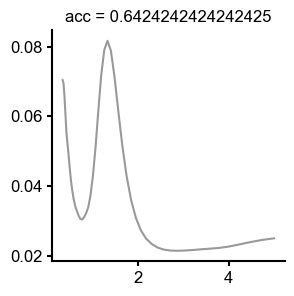

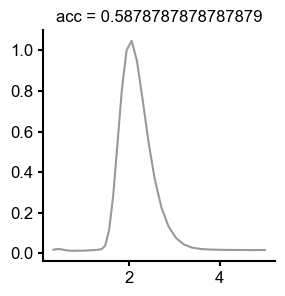

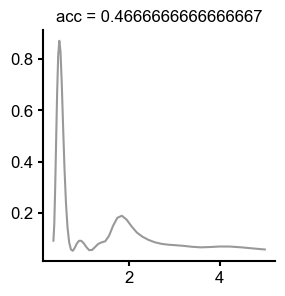

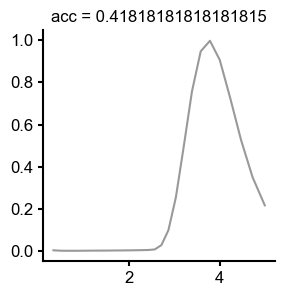

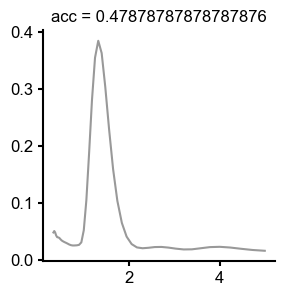

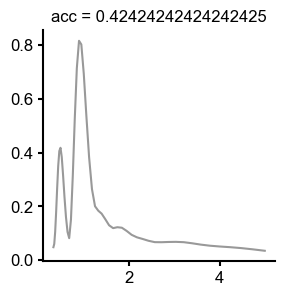

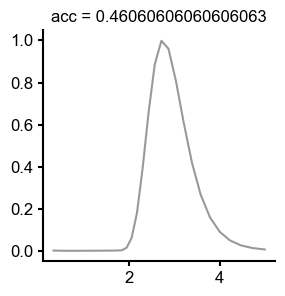

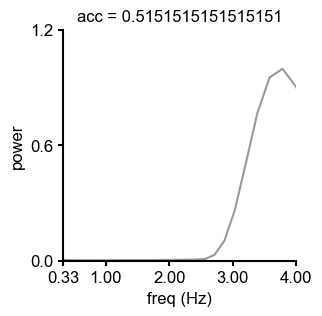

In [13]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True

t1 = 300
t2 = 900
for i in range(n_models):
    plt.figure(figsize = (3,3))
    plt.title("acc = " + str(data_list[i]['val_acc']))
    if np.sum(data_list[i]['w_rec'][1]) <150:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.legend()
plt.ylim(0,1.2)
plt.xticks([0.33,2,1,3,4])
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b1", facecolor="white", transparent=False)
plt.yticks([0,0.6,1.2])



(array([1., 0., 1., 0., 0., 0., 2., 4.]),
 array([0.08171323, 0.202435  , 0.32315677, 0.44387853, 0.5646003 ,
        0.68532207, 0.80604384, 0.92676561, 1.04748738]),
 <BarContainer object of 8 artists>)

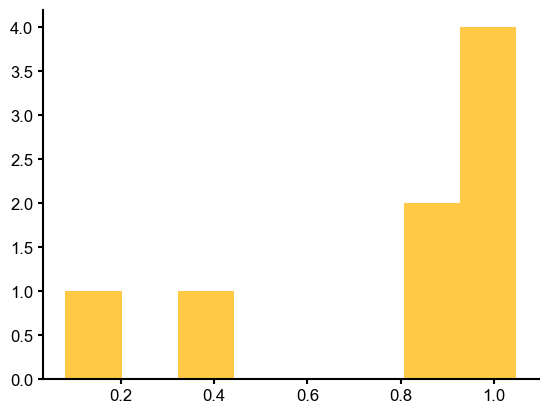

In [6]:
powers_b = []
for i in range(n_models):
    powers_b.append(np.max(np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1)))
np.mean(powers_b)
plt.hist(powers_b,bins=8)

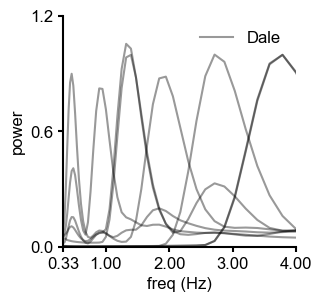

In [7]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))
t1 = 1340
t2 = 1940
for i in range(n_models ):
    if np.sum(data_list[i]['w_rec'][1]) <150:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.xticks([0.33,2,1,3,4])
plt.yticks([0,0.6,1.2])


plt.legend()
plt.ylim(0,1.2)
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b2", facecolor="white", transparent=False)


(array([1., 0., 1., 1., 0., 0., 0., 4., 0., 1.]),
 array([0.82253952, 0.8456853 , 0.86883108, 0.89197686, 0.91512264,
        0.93826843, 0.96141421, 0.98455999, 1.00770577, 1.03085155,
        1.05399733]),
 <BarContainer object of 10 artists>)

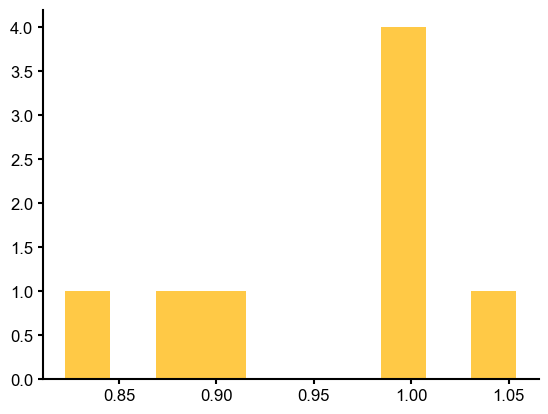

In [8]:
powers_d = []
for i in range(n_models ):
    powers_d.append(np.max(np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1)))
np.mean(powers_d)
plt.hist(powers_d)

In [9]:
from scipy.stats import ranksums
ranksums(powers_b,powers_d,alternative='two-sided')

RanksumsResult(statistic=-0.7351470441147051, pvalue=0.4622499461255427)

In [10]:
print(np.mean(powers_b),np.mean(powers_d))

0.7741307042027923 0.9558900791561918
